# Example usage of NRSur7dq4 surrogate model.

In [10]:
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.color_palette("colorblind")
from seaborn.palettes import SEABORN_PALETTES
colors = SEABORN_PALETTES["colorblind"]

import matplotlib.pyplot as P
import matplotlib.pylab as plt
%matplotlib inline

import gwsurrogate

## Download surrogate data, this only needs to be done once

In [ ]:
# This can take a few minutes
# gwsurrogate.catalog.pull('NRSur7dq4')

## Load the surrogate, this only needs to be done once at the start of a script

In [2]:
eob_sur = gwsurrogate.LoadSurrogate('../../surr_data/SEOBNRv4PHMSur.h5')
nr_sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

Loaded SEOBNRv4PHMSur model
Loaded NRSur7dq4 model


## Read the documentation

In [27]:
# help(sur)
precessing_opts = {'return_dynamics': True}

## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

In [32]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate

t_nr, h_nr, dyn_nr = nr_sur(q, chiA, chiB, dt=dt, f_low=f_low, precessing_opts=precessing_opts )   # dyn stands for dynamics, do dyn.keys() to see contents

In [33]:

t_eob, h_eob, dyn_eob = eob_sur(q, chiA, chiB, dt=dt, f_low=f_low, precessing_opts=precessing_opts) 

q, chi_eff:  4 0.0
Sub-domain number 1
q, chi_eff:  4 0.0
Sub-domain number 1
Initializing with q, chiA0, chiB0, init_quat,init_orbphase, t_ref:
4 [-0.2  0.4  0.1] [-0.5  0.2 -0.4] None 0 None
i0= 0


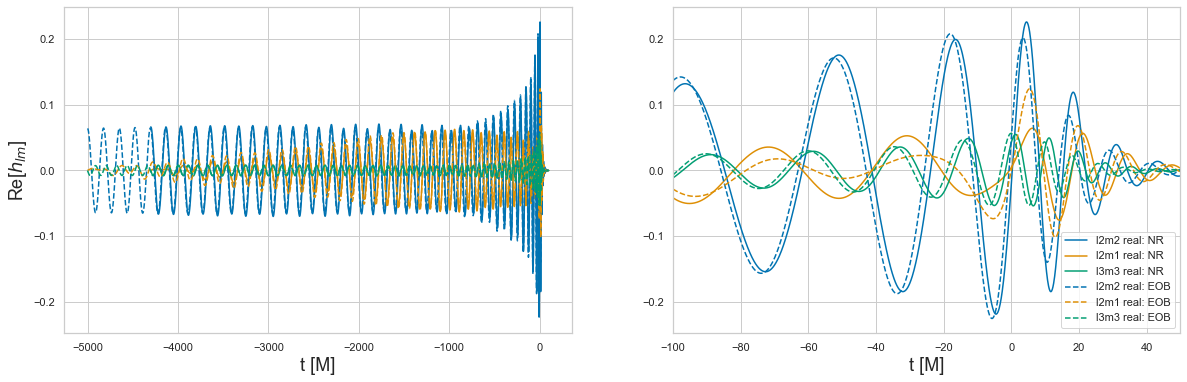

In [18]:

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
P.plot(t_nr, h_nr[(2,2)].real, label='l2m2 real: NR',c=colors[0])
P.plot(t_nr, h_nr[(2,1)].real, label='l2m1 real: NR',c=colors[1])
P.plot(t_nr, h_nr[(3,3)].real, label='l3m3 real: NR',c=colors[2])

P.plot(t_eob, h_eob[(2,2)].real, label='l2m2 real: EOB', c=colors[0], ls='dashed')
P.plot(t_eob, h_eob[(2,1)].real, label='l2m1 real: EOB',c=colors[1], ls='dashed')
P.plot(t_eob, h_eob[(3,3)].real, label='l3m3 real: EOB',c=colors[2], ls='dashed')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)


plt.subplot(1,2,2)
P.plot(t_nr, h_nr[(2,2)].real, label='l2m2 real: NR',c=colors[0])
P.plot(t_nr, h_nr[(2,1)].real, label='l2m1 real: NR',c=colors[1])
P.plot(t_nr, h_nr[(3,3)].real, label='l3m3 real: NR',c=colors[2])

P.plot(t_eob, h_eob[(2,2)].real, label='l2m2 real: EOB', c=colors[0], ls='dashed')
P.plot(t_eob, h_eob[(2,1)].real, label='l2m1 real: EOB',c=colors[1], ls='dashed')
P.plot(t_eob, h_eob[(3,3)].real, label='l3m3 real: EOB',c=colors[2], ls='dashed')
P.xlabel('t [M]', fontsize=18)
P.xlim(-100, 50)

P.legend()
plt.show()

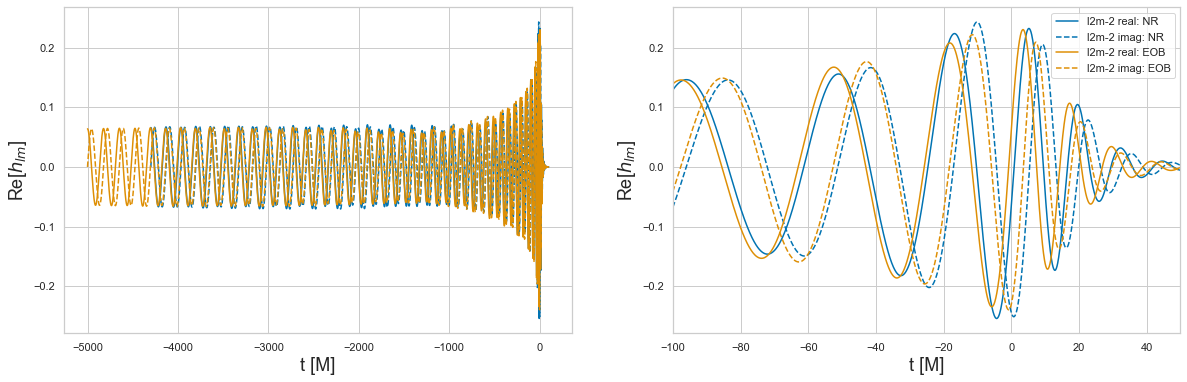

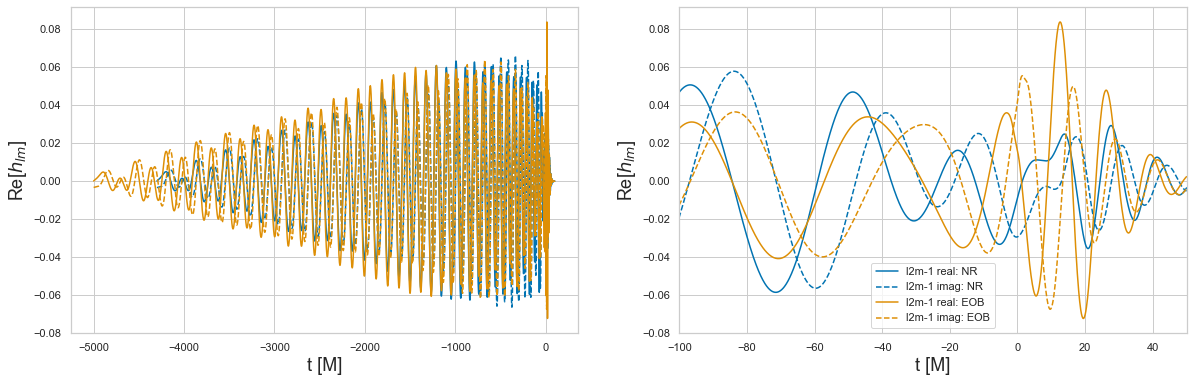

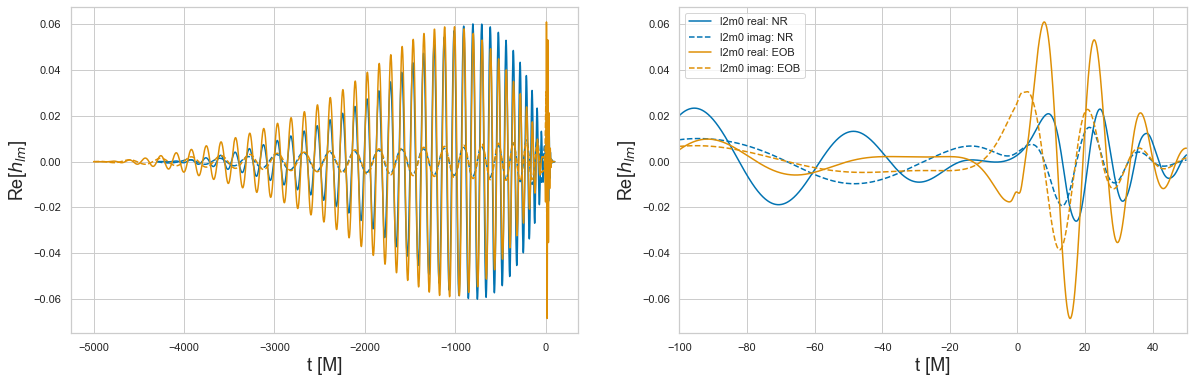

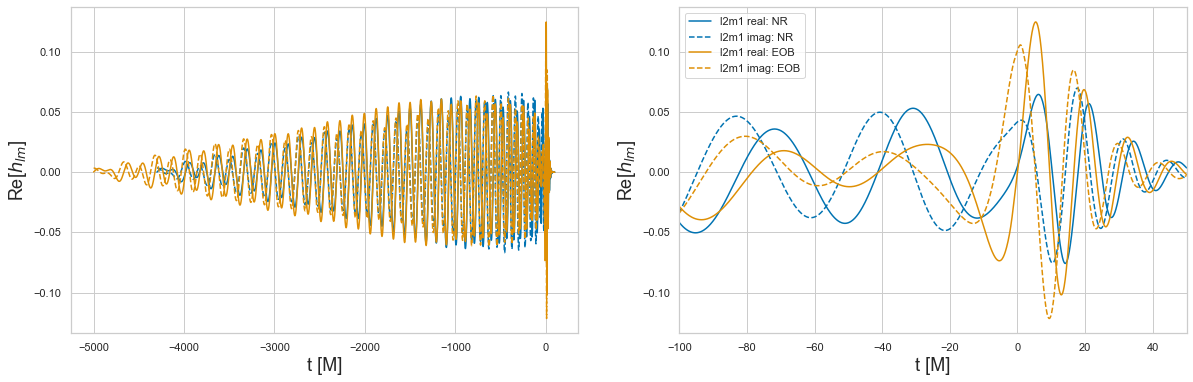

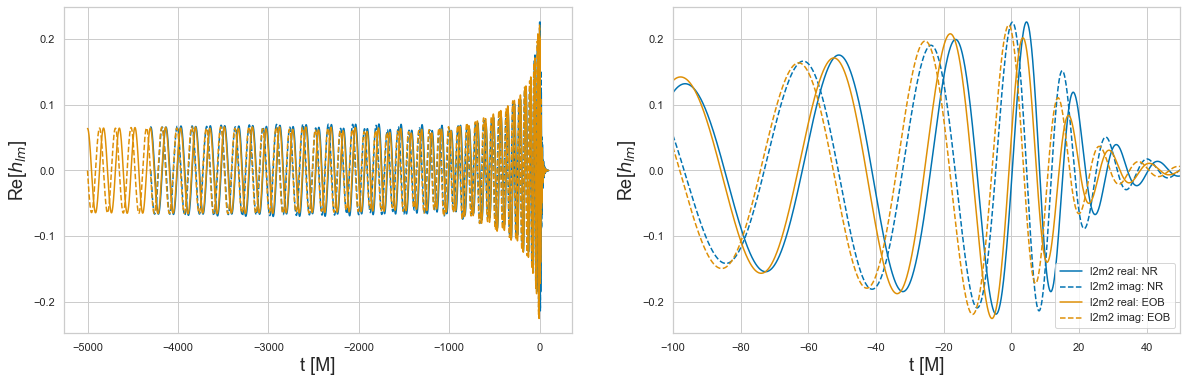

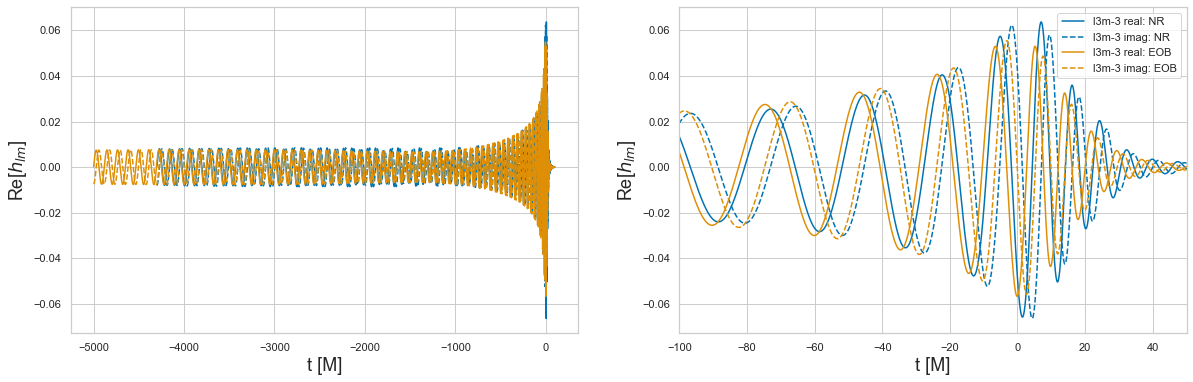

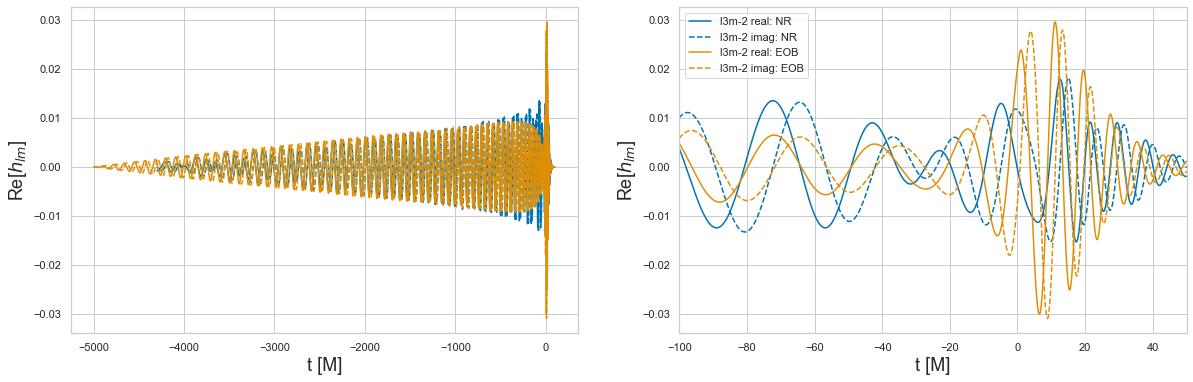

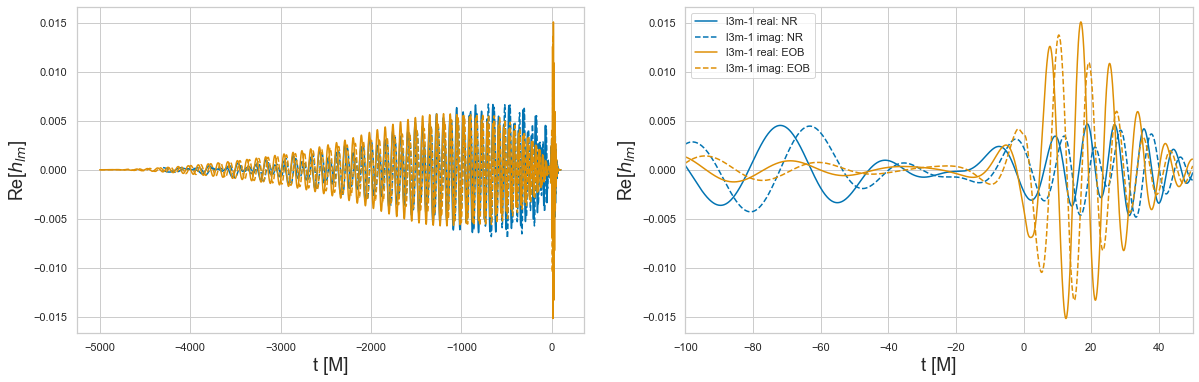

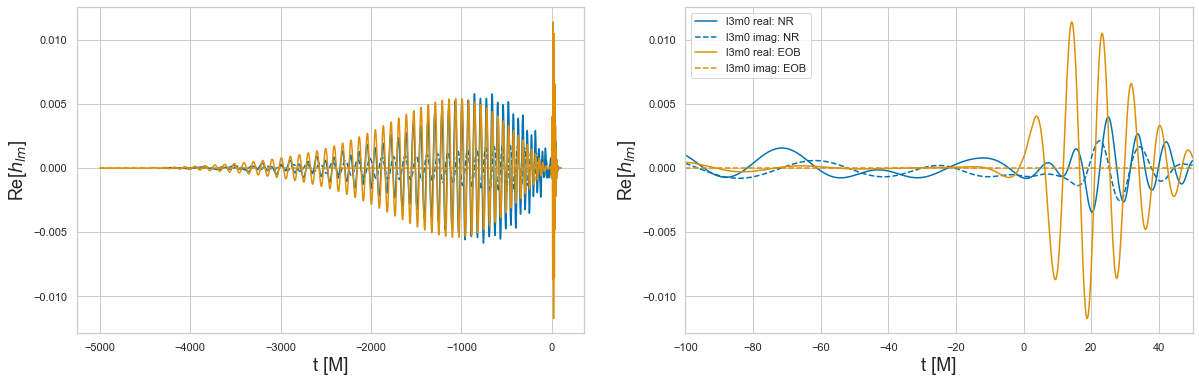

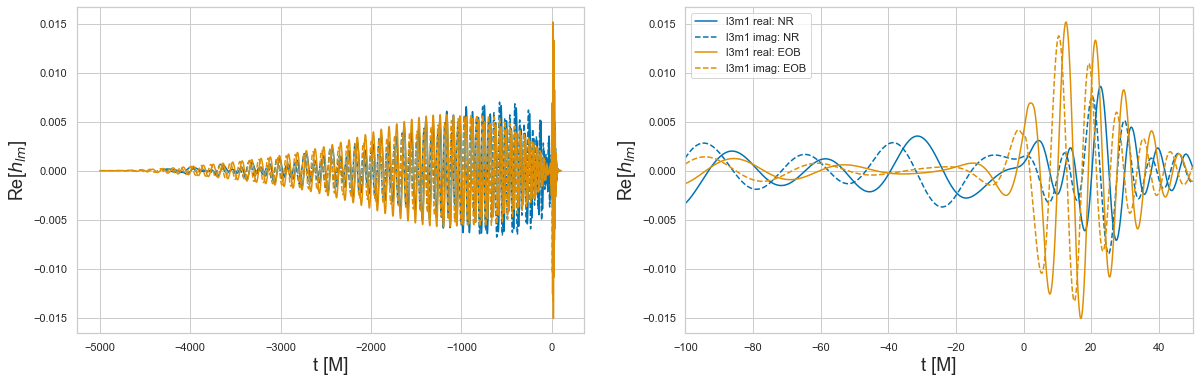

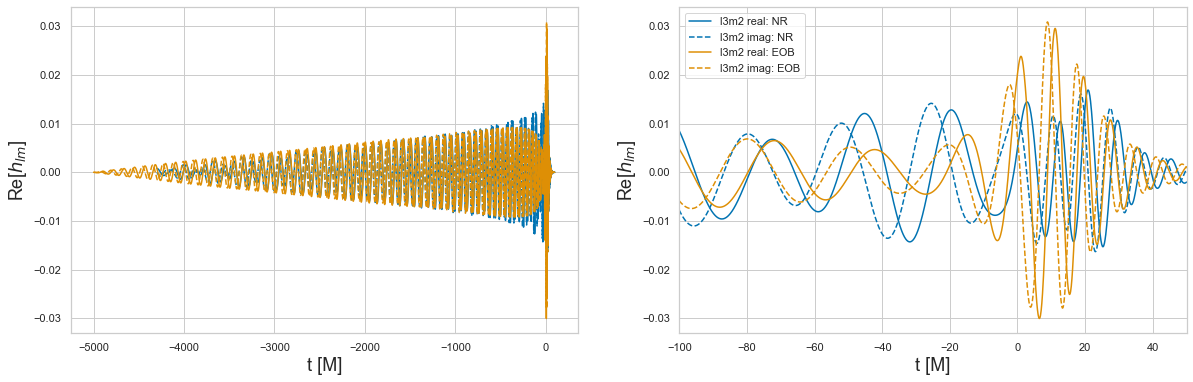

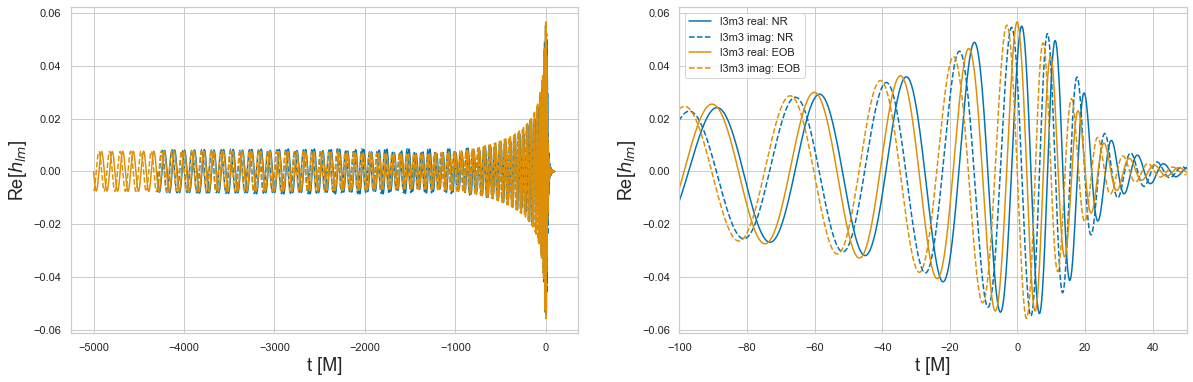

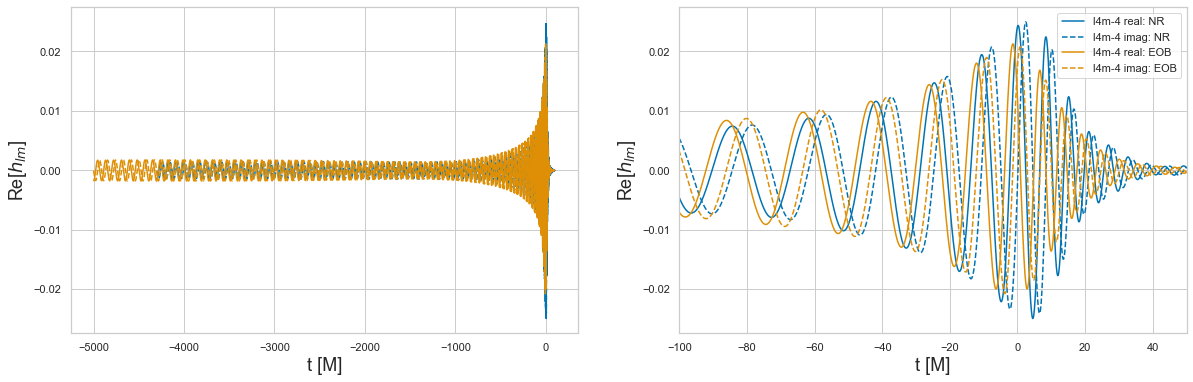

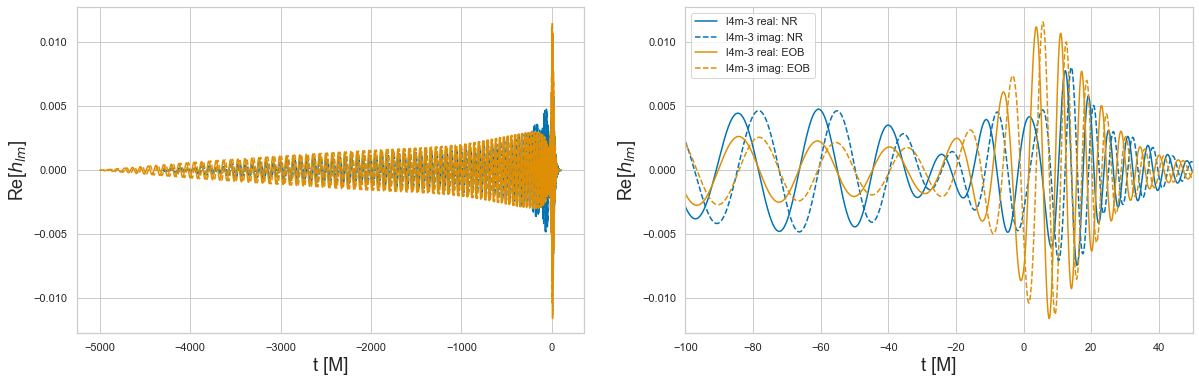

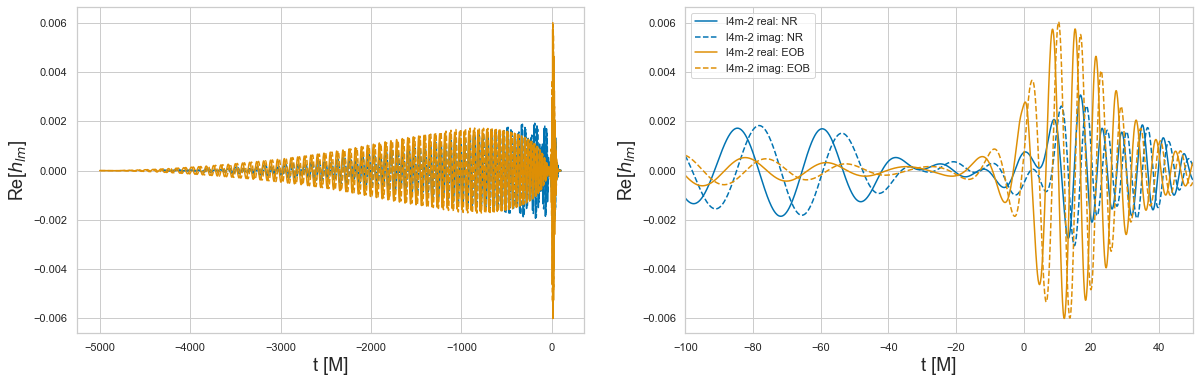

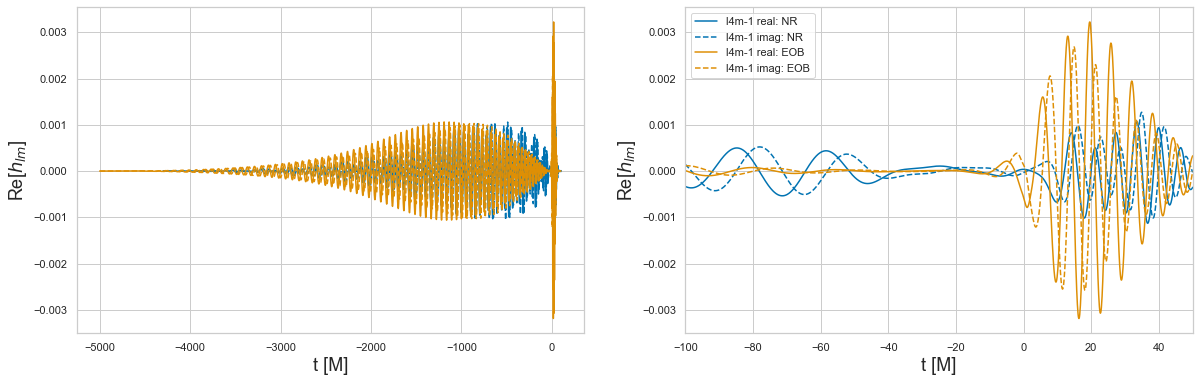

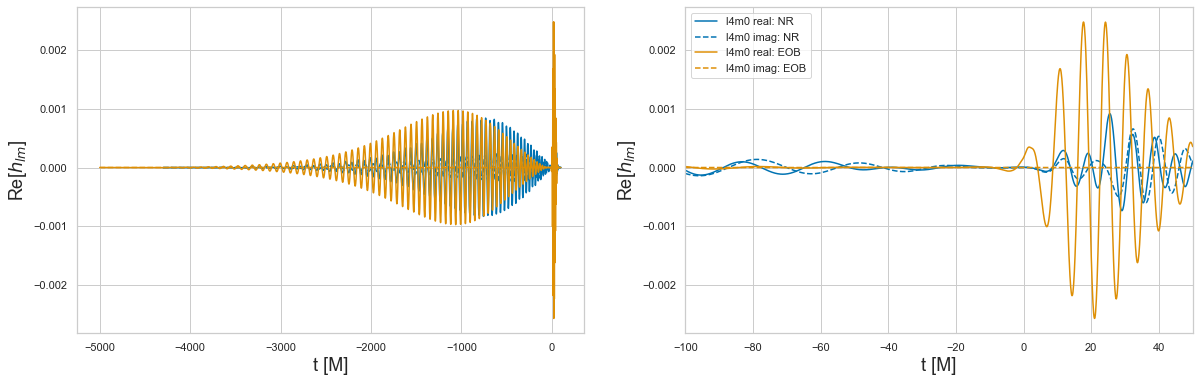

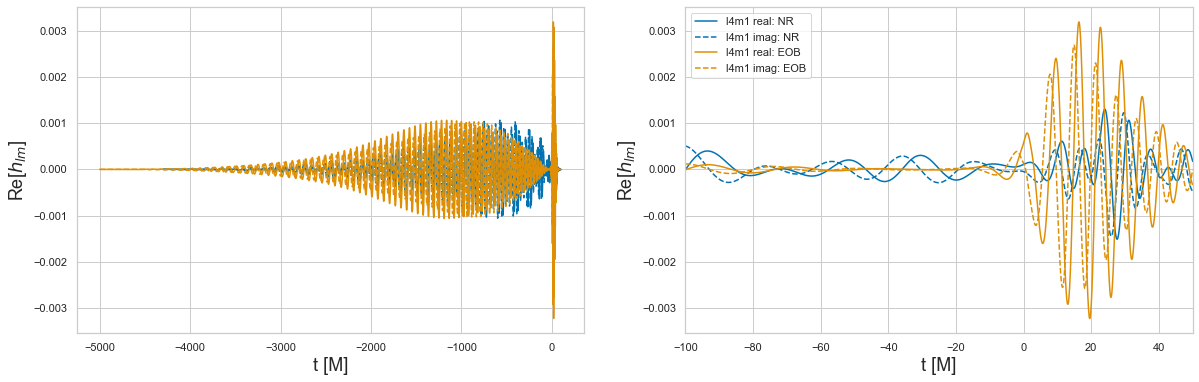

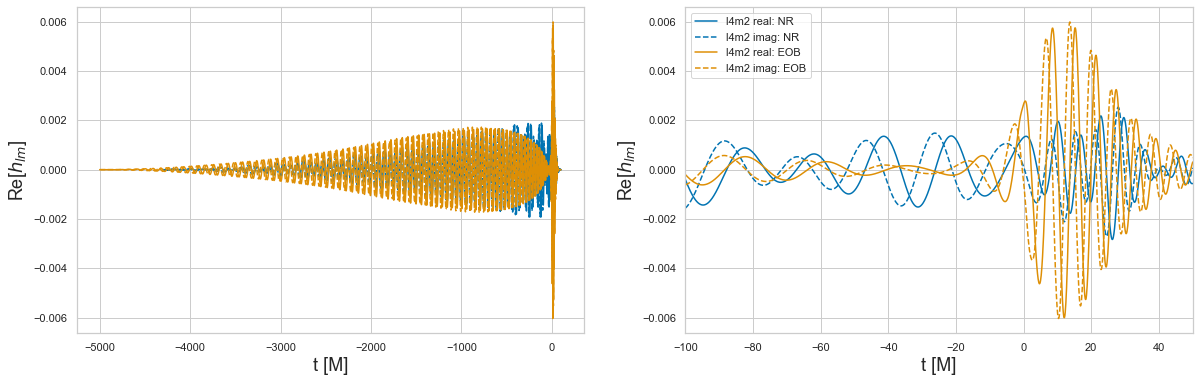

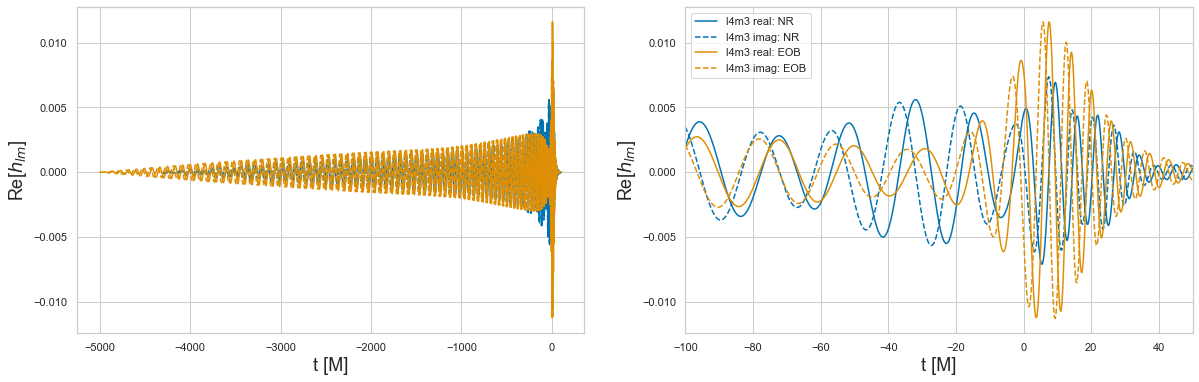

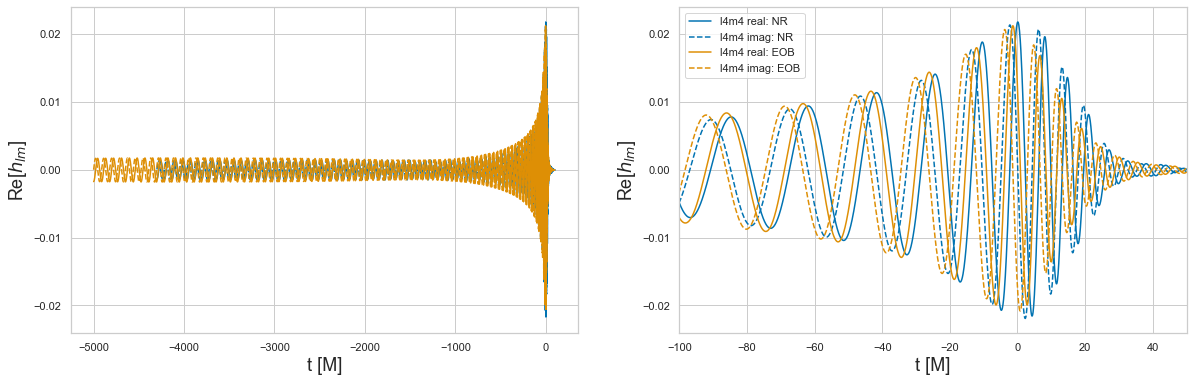

In [16]:
for k in h_nr:
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    P.plot(t_nr, h_nr[k].real, label='l{}m{} real: NR'.format(k[0], k[1]), c=colors[0])
    P.plot(t_nr, h_nr[k].imag, label='l{}m{} imag: NR'.format(k[0], k[1]), c=colors[0], ls='dashed')

    P.plot(t_eob, h_eob[k].real, label='l{}m{} real: EOB'.format(k[0], k[1]), c=colors[1])
    P.plot(t_eob, h_eob[k].imag, label='l{}m{} imag: EOB'.format(k[0], k[1]), c=colors[1], ls='dashed')
   
    P.ylabel('Re[$h_{lm}$]', fontsize=18)
    P.xlabel('t [M]', fontsize=18)


    plt.subplot(1,2,2)
    P.plot(t_nr, h_nr[k].real, label='l{}m{} real: NR'.format(k[0], k[1]), c=colors[0])
    P.plot(t_nr, h_nr[k].imag, label='l{}m{} imag: NR'.format(k[0], k[1]), c=colors[0], ls='dashed')

    P.plot(t_eob, h_eob[k].real, label='l{}m{} real: EOB'.format(k[0], k[1]), c=colors[1])
    P.plot(t_eob, h_eob[k].imag, label='l{}m{} imag: EOB'.format(k[0], k[1]), c=colors[1], ls='dashed')
   
    P.ylabel('Re[$h_{lm}$]', fontsize=18)
    P.xlabel('t [M]', fontsize=18)
    P.xlim(-100, 50)

    P.legend()
    plt.show()

TypeError: 'NoneType' object is not subscriptable

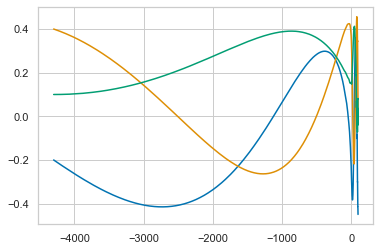

In [30]:
P.figure(1)
P.plot(t_nr, dyn_nr['chiA'][:,0], label='$\chi_{Ax}$', c=colors[0])
P.plot(t_nr, dyn_nr['chiA'][:,1], label='$\chi_{Ay}$', c=colors[1])
P.plot(t_nr, dyn_nr['chiA'][:,2], label='$\chi_{Az}$', c=colors[2])

P.plot(t_eob, dyn_eob['chiA'][:,0], label='$\chi_{Ax}$', c=colors[0], ls='dashed')
P.plot(t_eob, dyn_eob['chiA'][:,1], label='$\chi_{Ay}$', c=colors[1], ls='dashed')
P.plot(t_eob, dyn_eob['chiA'][:,2], label='$\chi_{Az}$', c=colors[2], ls='dashed')

P.ylabel('$\chi_A$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of heavier BH')
P.legend(fontsize=14)

P.figure(2)
P.plot(t_nr, dyn_nr['chiB'][:,0], label='$\chi_{Bx}$',c=colors[3])
P.plot(t_nr, dyn_nr['chiB'][:,1], label='$\chi_{By}$',c=colors[4])
P.plot(t_nr, dyn_nr['chiB'][:,2], label='$\chi_{Bz}$',c=colors[5])

P.plot(t_eob, dyn_eob['chiB'][:,0], label='$\chi_{Bx}$',c=colors[3], ls='dashed')
P.plot(t_eob, dyn_eob['chiB'][:,1], label='$\chi_{By}$',c=colors[4], ls='dashed')
P.plot(t_eob, dyn_eob['chiB'][:,2], label='$\chi_{Bz}$',c=colors[5], ls='dashed')

P.ylabel('$\chi_B$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of lighter BH')
P.legend(fontsize=14)

P.figure(3)
P.plot(t_nr, dyn_nr['orbphase'][:,],c=colors[0],)
P.plot(t_eob, dyn_eob['orbphase'][:,],c=colors[0],ls='dashed')
P.ylabel('$\phi_{\mathrm{orb}}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Orbital phase')

P.figure(4)
P.plot(t_nr, dyn_eob['q_copr'][0,:], label='$\hat{Q}_0$',c=colors[6])
P.plot(t_nr, dyn_eob['q_copr'][1,:], label='$\hat{Q}_1$',c=colors[7])
P.plot(t_nr, dyn_eob['q_copr'][2,:], label='$\hat{Q}_2$',c=colors[8])
P.plot(t_nr, dyn_eob['q_copr'][3,:], label='$\hat{Q}_3$',c=colors[9])

P.plot(t_eob, dyn_eob['q_copr'][0,:], label='$\hat{Q}_0$',c=colors[6], ls='dashed')
P.plot(t_eob, dyn_eob['q_copr'][1,:], label='$\hat{Q}_1$',c=colors[7], ls='dashed')
P.plot(t_eob, dyn_neob['q_copr'][2,:], label='$\hat{Q}_2$',c=colors[8], ls='dashed')
P.plot(t_eob, dyn_eob['q_copr'][3,:], label='$\hat{Q}_3$',c=colors[9], ls='dashed')
P.ylabel('$\hat{Q}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Coprecessing frame quaternions')
P.legend(fontsize=14)

In [31]:
dyn_eob

### Evaluate waveform modes in physical units

In [ ]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on the sky

In [ ]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use
inclination = np.pi/4
phi_ref = np.pi/5

# Will only include modes ell<=ellMax
# Returns h = h_+ -i h_x at (inclination, phi_ref) in the sky of the source frame
# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.plot(t, h.real)
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)

## Dynamics Surrogate

In [ ]:
q = 4
chiA = [-0.2, 0.4, 0.1]  # unless f_ref is given the spins are assumed to be given at the start of the waveform
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # step size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, precessing_opts={'return_dynamics': True})        # dyn stands for dynamics, do dyn.keys() to see contents

In [ ]:
# See all available dynamics data
dyn.keys()

In [ ]:
P.figure(1)
P.plot(t, dyn['chiA'][:,0], label='$\chi_{Ax}$')
P.plot(t, dyn['chiA'][:,1], label='$\chi_{Ay}$')
P.plot(t, dyn['chiA'][:,2], label='$\chi_{Az}$')
P.ylabel('$\chi_A$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of heavier BH')
P.legend(fontsize=14)

P.figure(2)
P.plot(t, dyn['chiB'][:,0], label='$\chi_{Bx}$')
P.plot(t, dyn['chiB'][:,1], label='$\chi_{By}$')
P.plot(t, dyn['chiB'][:,2], label='$\chi_{Bz}$')
P.ylabel('$\chi_B$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of lighter BH')
P.legend(fontsize=14)

P.figure(3)
P.plot(t, dyn['orbphase'][:,])
P.ylabel('$\phi_{\mathrm{orb}}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Orbital phase')

P.figure(4)
P.plot(t, dyn['q_copr'][0,:], label='$\hat{Q}_0$')
P.plot(t, dyn['q_copr'][1,:], label='$\hat{Q}_1$')
P.plot(t, dyn['q_copr'][2,:], label='$\hat{Q}_2$')
P.plot(t, dyn['q_copr'][3,:], label='$\hat{Q}_3$')
P.ylabel('$\hat{Q}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Coprecessing frame quaternions')
P.legend(fontsize=14)